# International-Match-Predictor


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
matches = pd.read_csv("results.csv")

Before We Start training our model and try to predict the outcomes, we need to have a good idea about our data only then can we do the necessary steps in order to train an efficient model.

In [4]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47980 entries, 0 to 47979
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47980 non-null  object
 1   home_team   47980 non-null  object
 2   away_team   47980 non-null  object
 3   home_score  47980 non-null  int64 
 4   away_score  47980 non-null  int64 
 5   tournament  47980 non-null  object
 6   city        47980 non-null  object
 7   country     47980 non-null  object
 8   neutral     47980 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [6]:
matches.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [7]:
matches.shape

(47980, 9)

We can identify the patterns or insight from the data more clearly when we visualize it to gain various insights from the data

In [11]:
def col_result(row):
    if row['home_score'] == row['away_score']:
        val = 'Draw'
    elif row['home_score'] > row['away_score']:
        val = row['home_team']
    else:
        val = row['away_team']
    return val

matches['result'] = matches.apply(col_result,axis=1)
matches.head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Scotland
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Scotland
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,Scotland
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,Scotland


In [19]:
matches['date'] = pd.to_datetime(matches['date'])
latest_date = matches['date'].max()
past_5years = latest_date - pd.DateOffset(years = 5)
matches_main = matches[matches['date'] >= past_5years]
matches_main.head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
43328,2020-01-07,Barbados,Canada,1,4,Friendly,Irvine,United States,True,Canada
43329,2020-01-09,Moldova,Sweden,0,1,Friendly,Doha,Qatar,True,Sweden
43330,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True,Canada
43331,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True,Sweden
43332,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True,Iceland
43333,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True,Iceland
43334,2020-02-01,United States,Costa Rica,1,0,Friendly,Carson,United States,False,United States
43335,2020-09-03,Germany,Spain,1,1,UEFA Nations League,Stuttgart,Germany,False,Draw
43336,2020-09-03,Ukraine,Switzerland,2,1,UEFA Nations League,Lviv,Ukraine,False,Ukraine
43337,2020-09-03,Russia,Serbia,3,1,UEFA Nations League,Moscow,Russia,False,Russia


### Discovering patterns in the data
To predict the outcome of the matches, we need to find insights in the data that can help us uncover the factors which contribute in predicting a winner


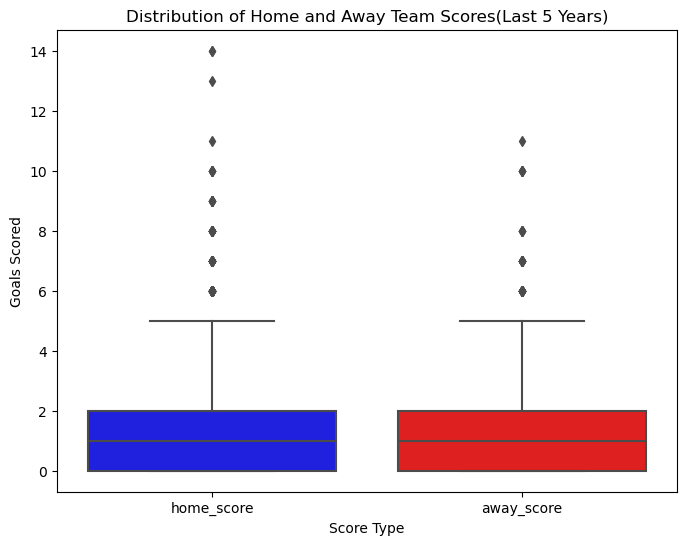

In [23]:
matches_scores = matches_main.melt(value_vars = ['home_score','away_score'],var_name = 'Score_Type' , value_name = 'Goals')
plt.figure(figsize = (8,6))

sns.boxplot(x='Score_Type',y='Goals',data = matches_scores,palette = ['blue','red'])
plt.title("Distribution of Home and Away Team Scores(Last 5 Years)")
plt.xlabel("Score Type")
plt.ylabel("Goals Scored")

plt.show()